In [ ]:
# Load the Seurat library
library(Seurat)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')



In [ ]:
seurat_obj1 <- readRDS("~//Monkey//Seurat4.0_Pigmentary_epi.rds")
seurat_obj2 <- readRDS("~//Monkey//Seurat4.0_Pineal_gland.rds")


In [ ]:
seurat_obj1 <- RenameCells(seurat_obj1, add.cell.id = "Pigmentary_epi")
seurat_obj2 <- RenameCells(seurat_obj2, add.cell.id = "Pineal_gland")


In [ ]:
head(seurat_obj1@meta.data)
head(seurat_obj2@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,Batch,percent.mt,seurat_clusters,Sample,Tissue,Celltype,Abbreviation
,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Pigmentary_epi_CCTGTCGTCACGCAATCCAC_1,SeuratProject,6157.731,3222,Pigmentary_epi_303,0.01057905,6,MM1,Pigmentary_epi,Melanocyte,Melanocyte
Pigmentary_epi_GTATACTTAGGCTAAGGTTC_1,SeuratProject,6395.223,2941,Pigmentary_epi_303,0.04982439,8,MM1,Pigmentary_epi,Stromal cell,Stromal
Pigmentary_epi_AGTTCCTGTCTTCTCACTCC_1,SeuratProject,4734.096,2655,Pigmentary_epi_303,0.15675640,5,MM1,Pigmentary_epi,Stromal cell,Stromal
Pigmentary_epi_CGCGAGGACCAAGTCCTCCT_1,SeuratProject,5000.070,2661,Pigmentary_epi_303,0.00000000,1,MM1,Pigmentary_epi,Stromal cell,Stromal
Pigmentary_epi_CGCGAATCAGCACATGTTAC_1,SeuratProject,6001.162,2729,Pigmentary_epi_303,0.01351544,6,MM1,Pigmentary_epi,Melanocyte,Melanocyte
Pigmentary_epi_TTGCAGCCGCCTGGCTTCCG_1,SeuratProject,4670.891,2537,Pigmentary_epi_303,0.00000000,2,MM1,Pigmentary_epi,Retinal pigmentary epithelial cell,Retinal pigmentary epi


,orig.ident,nCount_RNA,nFeature_RNA,Batch,percent.mt,seurat_clusters,Sample,Tissue,Celltype,Abbreviation
,<chr>,<dbl>,<int>,<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>
Pineal_gland_GTGCTTAGTTAACGAGTATT_1,SeuratProject,24051.031,5366,Pineal_gland_431,0.07123205,3,FM3,Pineal_gland,Pinealocyte,Pinealocyte
Pineal_gland_TTCGTCTAGCATCTCGCTGC_1,SeuratProject,12857.479,4304,Pineal_gland_431,0.07442522,7,FM3,Pineal_gland,Endo,Endo
Pineal_gland_AATGGAATACTATCATCTCT_1,SeuratProject,9813.924,3443,Pineal_gland_431,0.05851872,2,FM3,Pineal_gland,Pinealocyte,Pinealocyte
Pineal_gland_AGAGCAGCGGTTAACGTAGG_1,SeuratProject,8692.330,3571,Pineal_gland_431,1.61937241,6,FM3,Pineal_gland,Adrenergic_Neur,Adrenergic neuron
Pineal_gland_CAGATCGGTCCTCTGTCTCC_1,SeuratProject,8645.364,3661,Pineal_gland_431,3.80217577,4,FM3,Pineal_gland,Pinealocyte,Pinealocyte
Pineal_gland_CCTCATGCCAGCCTCCGGTC_1,SeuratProject,8639.005,3366,Pineal_gland_431,0.02121871,1,FM3,Pineal_gland,Pinealocyte,Pinealocyte


In [ ]:
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Extract cell annotations from the original objects
annotations1 <- seurat_obj1@meta.data %>%
                select(Celltype) %>%
                rownames_to_column("cell")

In [ ]:
head(annotations1)

,cell,Celltype
,<chr>,<chr>
1,Pigmentary_epi_CCTGTCGTCACGCAATCCAC_1,Melanocyte
2,Pigmentary_epi_GTATACTTAGGCTAAGGTTC_1,Stromal cell
3,Pigmentary_epi_AGTTCCTGTCTTCTCACTCC_1,Stromal cell
4,Pigmentary_epi_CGCGAGGACCAAGTCCTCCT_1,Stromal cell
5,Pigmentary_epi_CGCGAATCAGCACATGTTAC_1,Melanocyte
6,Pigmentary_epi_TTGCAGCCGCCTGGCTTCCG_1,Retinal pigmentary epithelial cell


In [ ]:
annotations2 <- seurat_obj2@meta.data %>%
                select(Celltype) %>%
                rownames_to_column("cell")
head(annotations2)

,cell,Celltype
,<chr>,<chr>
1,Pineal_gland_GTGCTTAGTTAACGAGTATT_1,Pinealocyte
2,Pineal_gland_TTCGTCTAGCATCTCGCTGC_1,Endo
3,Pineal_gland_AATGGAATACTATCATCTCT_1,Pinealocyte
4,Pineal_gland_AGAGCAGCGGTTAACGTAGG_1,Adrenergic_Neur
5,Pineal_gland_CAGATCGGTCCTCTGTCTCC_1,Pinealocyte
6,Pineal_gland_CCTCATGCCAGCCTCCGGTC_1,Pinealocyte


In [ ]:
# Combine the annotations into a single dataframe
combined_annotations <- bind_rows(annotations1, annotations2)

In [ ]:
# Ensure the cell names match those in the merged object
rownames(combined_annotations) <- combined_annotations$cell

In [ ]:
merged_seurat <- merge(seurat_obj1, y = seurat_obj2)

In [ ]:
head(merged_seurat)

,orig.ident,nCount_RNA,nFeature_RNA,Batch,percent.mt,seurat_clusters,Sample,Tissue,Celltype,Abbreviation
,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Pigmentary_epi_CCTGTCGTCACGCAATCCAC_1,SeuratProject,6157.731,3222,Pigmentary_epi_303,0.01057905,6,MM1,Pigmentary_epi,Melanocyte,Melanocyte
Pigmentary_epi_GTATACTTAGGCTAAGGTTC_1,SeuratProject,6395.223,2941,Pigmentary_epi_303,0.04982439,8,MM1,Pigmentary_epi,Stromal cell,Stromal
Pigmentary_epi_AGTTCCTGTCTTCTCACTCC_1,SeuratProject,4734.096,2655,Pigmentary_epi_303,0.15675640,5,MM1,Pigmentary_epi,Stromal cell,Stromal
Pigmentary_epi_CGCGAGGACCAAGTCCTCCT_1,SeuratProject,5000.070,2661,Pigmentary_epi_303,0.00000000,1,MM1,Pigmentary_epi,Stromal cell,Stromal
Pigmentary_epi_CGCGAATCAGCACATGTTAC_1,SeuratProject,6001.162,2729,Pigmentary_epi_303,0.01351544,6,MM1,Pigmentary_epi,Melanocyte,Melanocyte
Pigmentary_epi_TTGCAGCCGCCTGGCTTCCG_1,SeuratProject,4670.891,2537,Pigmentary_epi_303,0.00000000,2,MM1,Pigmentary_epi,Retinal pigmentary epithelial cell,Retinal pigmentary epi
Pigmentary_epi_AAGATGGCCTATCGTATAGG_1,SeuratProject,4991.471,2541,Pigmentary_epi_303,0.00000000,0,MM1,Pigmentary_epi,Retinal pigmentary epithelial cell,Retinal pigmentary epi
Pigmentary_epi_CGATAGAATACACGTACCAA_1,SeuratProject,5249.691,3025,Pigmentary_epi_303,0.03897424,8,MM1,Pigmentary_epi,Stromal cell,Stromal
Pigmentary_epi_GAATTCTCGGCTTAGCAACC_1,SeuratProject,5097.368,2994,Pigmentary_epi_303,0.01486881,6,MM1,Pigmentary_epi,Melanocyte,Melanocyte


In [ ]:
# Add the annotations to the merged Seurat object
merged_seurat <- AddMetaData(merged_seurat, metadata = combined_annotations, col.name = "Celltype")


Warning message:
“The following arguments are not used: nselect”
Centering and scaling data matrix

PC_ 1 
Positive:  UTRN, TCF7L1, RBMS3, PITPNC1, AUTS2, ANTXR1, BICC1, SYNE2, PID1, CALD1 
	   ENSMFAG00000030038, FRMD4A, CACHD1, EYA2, UACA, NLGN1, PARD3B, FHL2, PDE5A, SULF1 
	   DOCK5, PRKG1, FBXL7, COL25A1, RORB, PDE7B, ENSMFAG00000002541, ATP13A5, PDE3A, ABCA8 
Negative:  CSMD1, TPH1, IQCJ-SCHIP1, PCDH15, SYT1, NRXN3, DGKB, NRXN1, NTM, GRIK1 
	   USH2A, EYS, TMEM108, SLC8A1, MEIS1, STXBP5L, DACH2, CTNNA2, SLC5A7, CA10 
	   ENSMFAG00000030097, MARCH1, HCN1, ENSMFAG00000038867, MDGA2, NEGR1, CNTNAP2, CADM1, RAPGEF5, PLCL1 
PC_ 2 
Positive:  ANTXR1, BICC1, CACHD1, GPC6, ENSMFAG00000030038, ADAMTSL1, EYA1, FHL2, RCAN2, PDE5A 
	   PLXDC2, EXT1, PID1, ATP13A5, ANKRD44, ENSMFAG00000002541, PLCB1, SETBP1, SLIT2, SLC35F3 
	   PDE7B, COL25A1, TRDN, PDZRN3, SDC2, ABCA8, RARB, ECE1, FBN2, COL1A2 
Negative:  RGR, INPP5K, RPE65, MYRIP, RLBP1, EZR, TRPM3, GLDC, PITPNA, TMEM56 
	   C1QTNF5, GPM6A, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 26592
Number of edges: 914314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9054
Number of communities: 18
Elapsed time: 6 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:03:53 UMAP embedding parameters a = 0.9922 b = 1.112

10:03:53 Read 26592 rows and found 20 numeric columns

10:03:53 Using Annoy for neighbor search, n_neighbors = 30

10:03:53 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:03:56 Writing NN index file to temp file /tmp/RtmpIDK77B/file213f571ccfa6cc

10:03:56 Searching Annoy index using 1 thread, search_k = 3000

10:04:05 Annoy recall = 100%

10:04:06 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbor

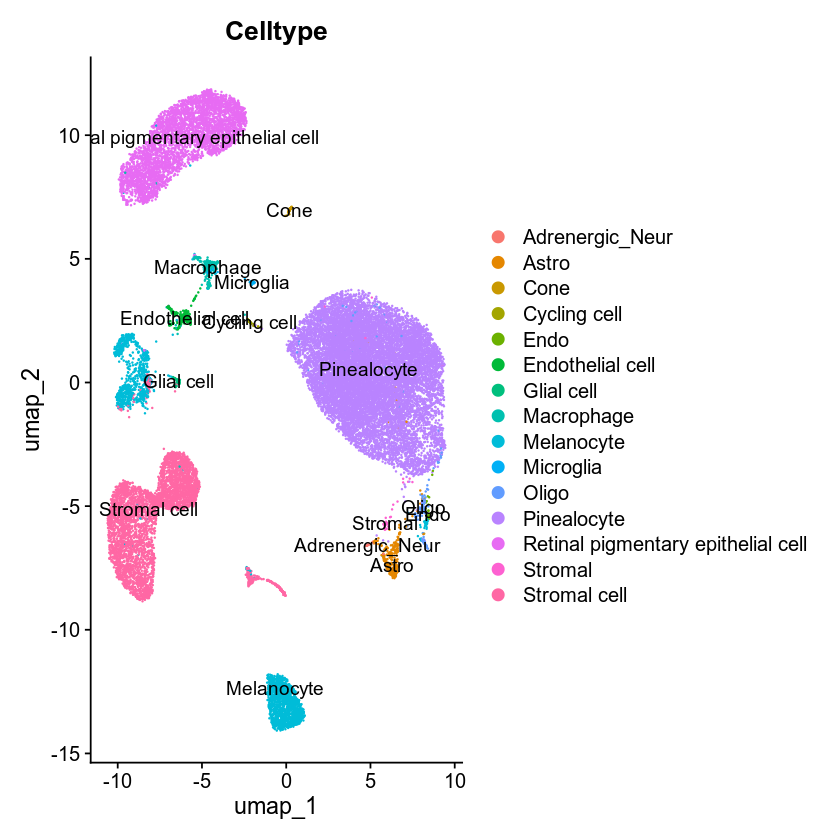

In [ ]:
# Normalize and find variable features
merged_seurat <- NormalizeData(merged_seurat)
merged_seurat <- FindVariableFeatures(merged_seurat, selection.method = "vst", nfeatures = 2000)

# Scale the data
merged_seurat <- ScaleData(merged_seurat)

# Perform PCA
merged_seurat <- RunPCA(merged_seurat, features = VariableFeatures(object = merged_seurat))

# Find neighbors and clusters
merged_seurat <- FindNeighbors(merged_seurat, dims = 1:20)
merged_seurat <- FindClusters(merged_seurat, resolution = 0.5)

# Run UMAP for visualization
merged_seurat <- RunUMAP(merged_seurat, dims = 1:20)

# Plot the clusters with cell annotations
DimPlot(merged_seurat, reduction = "umap", label = TRUE, group.by = "Celltype")


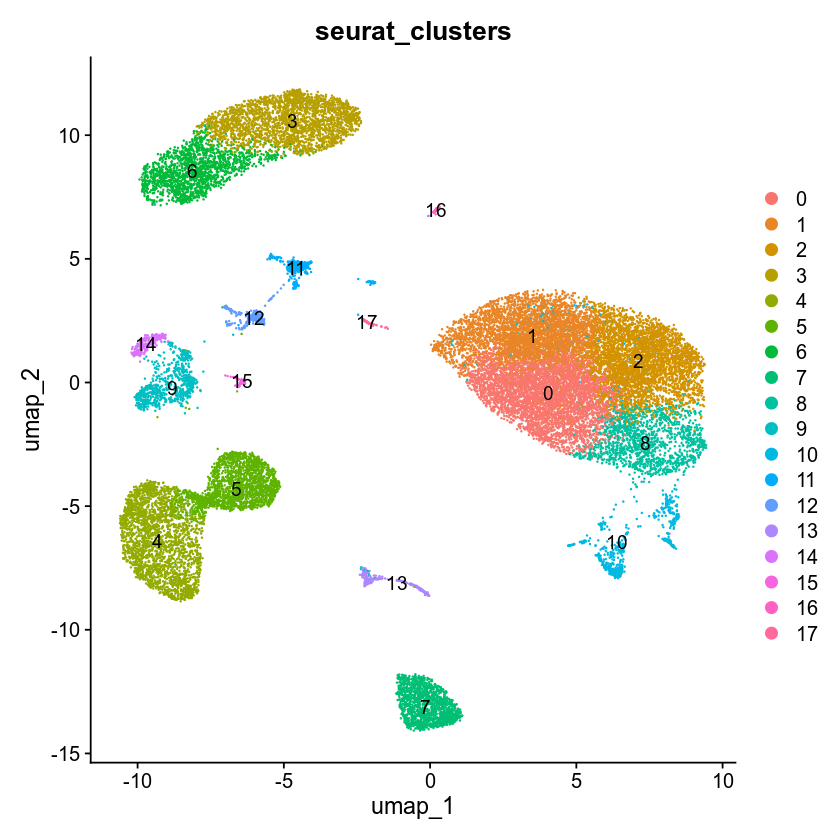

In [ ]:
DimPlot(merged_seurat, reduction = "umap", label = TRUE, group.by = "seurat_clusters")


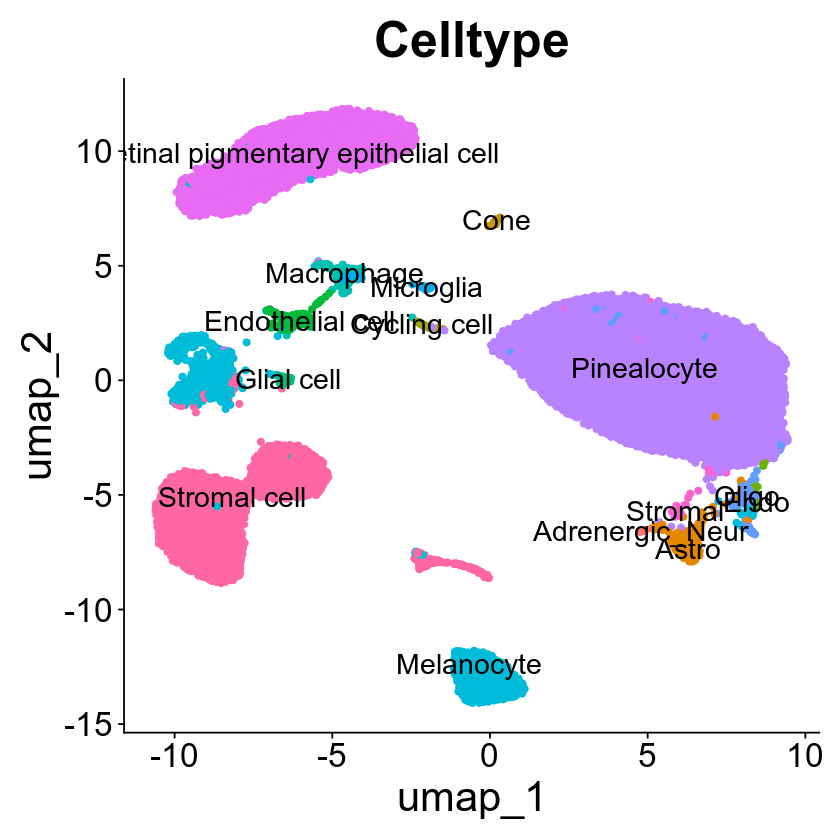

In [ ]:
# Assuming `seurat_obj` is your Seurat object and UMAP has been computed
umap_plot <- DimPlot(merged_seurat, reduction = "umap", group.by = "Celltype", label = TRUE, pt.size = 1.6, label.size = 6) + NoLegend()

# Increase the size of the text labels
umap_plot + theme(
  text = element_text(size = 20),  # General text size
  plot.title = element_text(size = 30, face = "bold"),  # Title text size
  axis.title = element_text(size = 25),  # Axis title text size
  axis.text = element_text(size = 20)  # Axis text size
)

In [ ]:
# Remove multiple clusters, e.g., clusters 3 and 5
seurat_obj_filtered <- subset(merged_seurat, subset = seurat_clusters != "14" & seurat_clusters != "15" & seurat_clusters != "16" & seurat_clusters != "17"  & seurat_clusters != "13"  & seurat_clusters != "9",)


Warning message:
“The following arguments are not used: nselect”
Centering and scaling data matrix

PC_ 1 
Positive:  CSMD1, TPH1, IQCJ-SCHIP1, PCDH15, NRXN3, SYT1, DGKB, NRXN1, NTM, GRIK1 
	   USH2A, EYS, TMEM108, SLC8A1, MEIS1, STXBP5L, CTNNA2, DACH2, SLC5A7, CA10 
	   ENSMFAG00000030097, MARCH1, MDGA2, NEGR1, HCN1, ENSMFAG00000038867, CNTNAP2, PLCL1, RAPGEF5, CADM2 
Negative:  UTRN, TCF7L1, PITPNC1, RBMS3, ANTXR1, SYNE2, AUTS2, BICC1, ENSMFAG00000030038, PID1 
	   CACHD1, EYA2, CALD1, FHL2, FRMD4A, UACA, NLGN1, PDE5A, PARD3B, SULF1 
	   DOCK5, COL25A1, ATP13A5, ENSMFAG00000002541, RORB, PDE7B, FBXL7, COL1A2, PRKG1, ABCA8 
PC_ 2 
Positive:  EBF1, NHS, ANTXR1, BICC1, CACHD1, ENSMFAG00000030038, ADAMTSL1, GPC6, EYA1, FHL2 
	   RCAN2, PDE5A, PLXDC2, ATP13A5, EXT1, ENSMFAG00000002541, PID1, PLCB1, ANKRD44, SETBP1 
	   SLC35F3, COL25A1, SLIT2, PDE7B, COL1A2, ABCA8, PDZRN3, RARB, ECE1, SDC2 
Negative:  RGR, INPP5K, RLBP1, RPE65, MYRIP, EZR, GLDC, TRPM3, PITPNA, TMEM56 
	   C1QTNF5, GPM6A, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25060
Number of edges: 834331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8675
Number of communities: 15
Elapsed time: 5 seconds


10:45:19 UMAP embedding parameters a = 0.9922 b = 1.112

10:45:19 Read 25060 rows and found 15 numeric columns

10:45:19 Using Annoy for neighbor search, n_neighbors = 30

10:45:19 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:45:22 Writing NN index file to temp file /tmp/RtmpIDK77B/file213f57429a703d

10:45:22 Searching Annoy index using 1 thread, search_k = 3000

10:45:31 Annoy recall = 100%

10:45:32 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:45:34 Initializing from normalized Laplacian + noise (using RSpectra)

10:45:39 Commencing optimization for 200 epochs, with 1062716 positive edges

10:45:54 Optimization finished




   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14 
3748 3173 3077 2626 2071 1722 1622 1613 1492 1455  977  473  363  336  312 

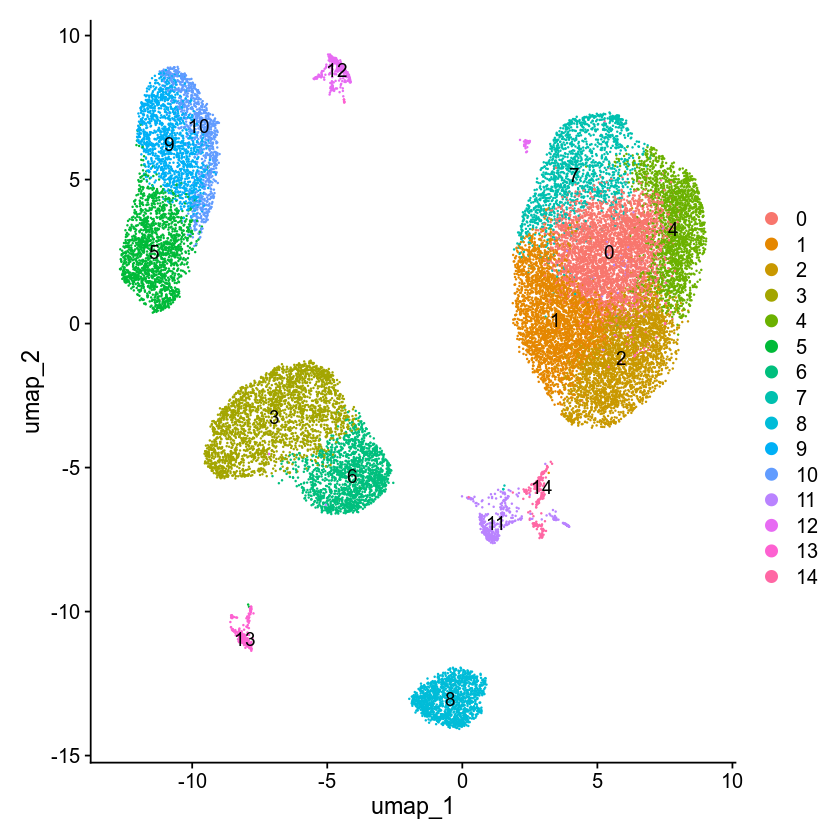

In [ ]:


# Step 2: Normalize the data again (if needed)
seurat_obj_filtered <- NormalizeData(seurat_obj_filtered)

# Step 3: Find variable features
seurat_obj_filtered <- FindVariableFeatures(seurat_obj_filtered)

# Step 4: Scale the data
seurat_obj_filtered <- ScaleData(seurat_obj_filtered)

# Step 5: Perform PCA
seurat_obj_filtered <- RunPCA(seurat_obj_filtered)

# Step 6: Find neighbors
seurat_obj_filtered <- FindNeighbors(seurat_obj_filtered, dims = 1:15)

# Step 7: Perform clustering (you can adjust the resolution parameter)
seurat_obj_filtered <- FindClusters(seurat_obj_filtered)

# Step 8: Run UMAP or t-SNE for visualization (optional)
seurat_obj_filtered <- RunUMAP(seurat_obj_filtered, dims = 1:15)
# or
# seurat_obj_filtered <- RunTSNE(seurat_obj_filtered, dims = 1:10)

# Step 9: Plot the UMAP/t-SNE with the new clusters
DimPlot(seurat_obj_filtered, reduction = "umap", label = TRUE)
# or
# DimPlot(seurat_obj_filtered, reduction = "tsne", label = TRUE)

# Step 10: Inspect the new clusters
table(seurat_obj_filtered$seurat_clusters)


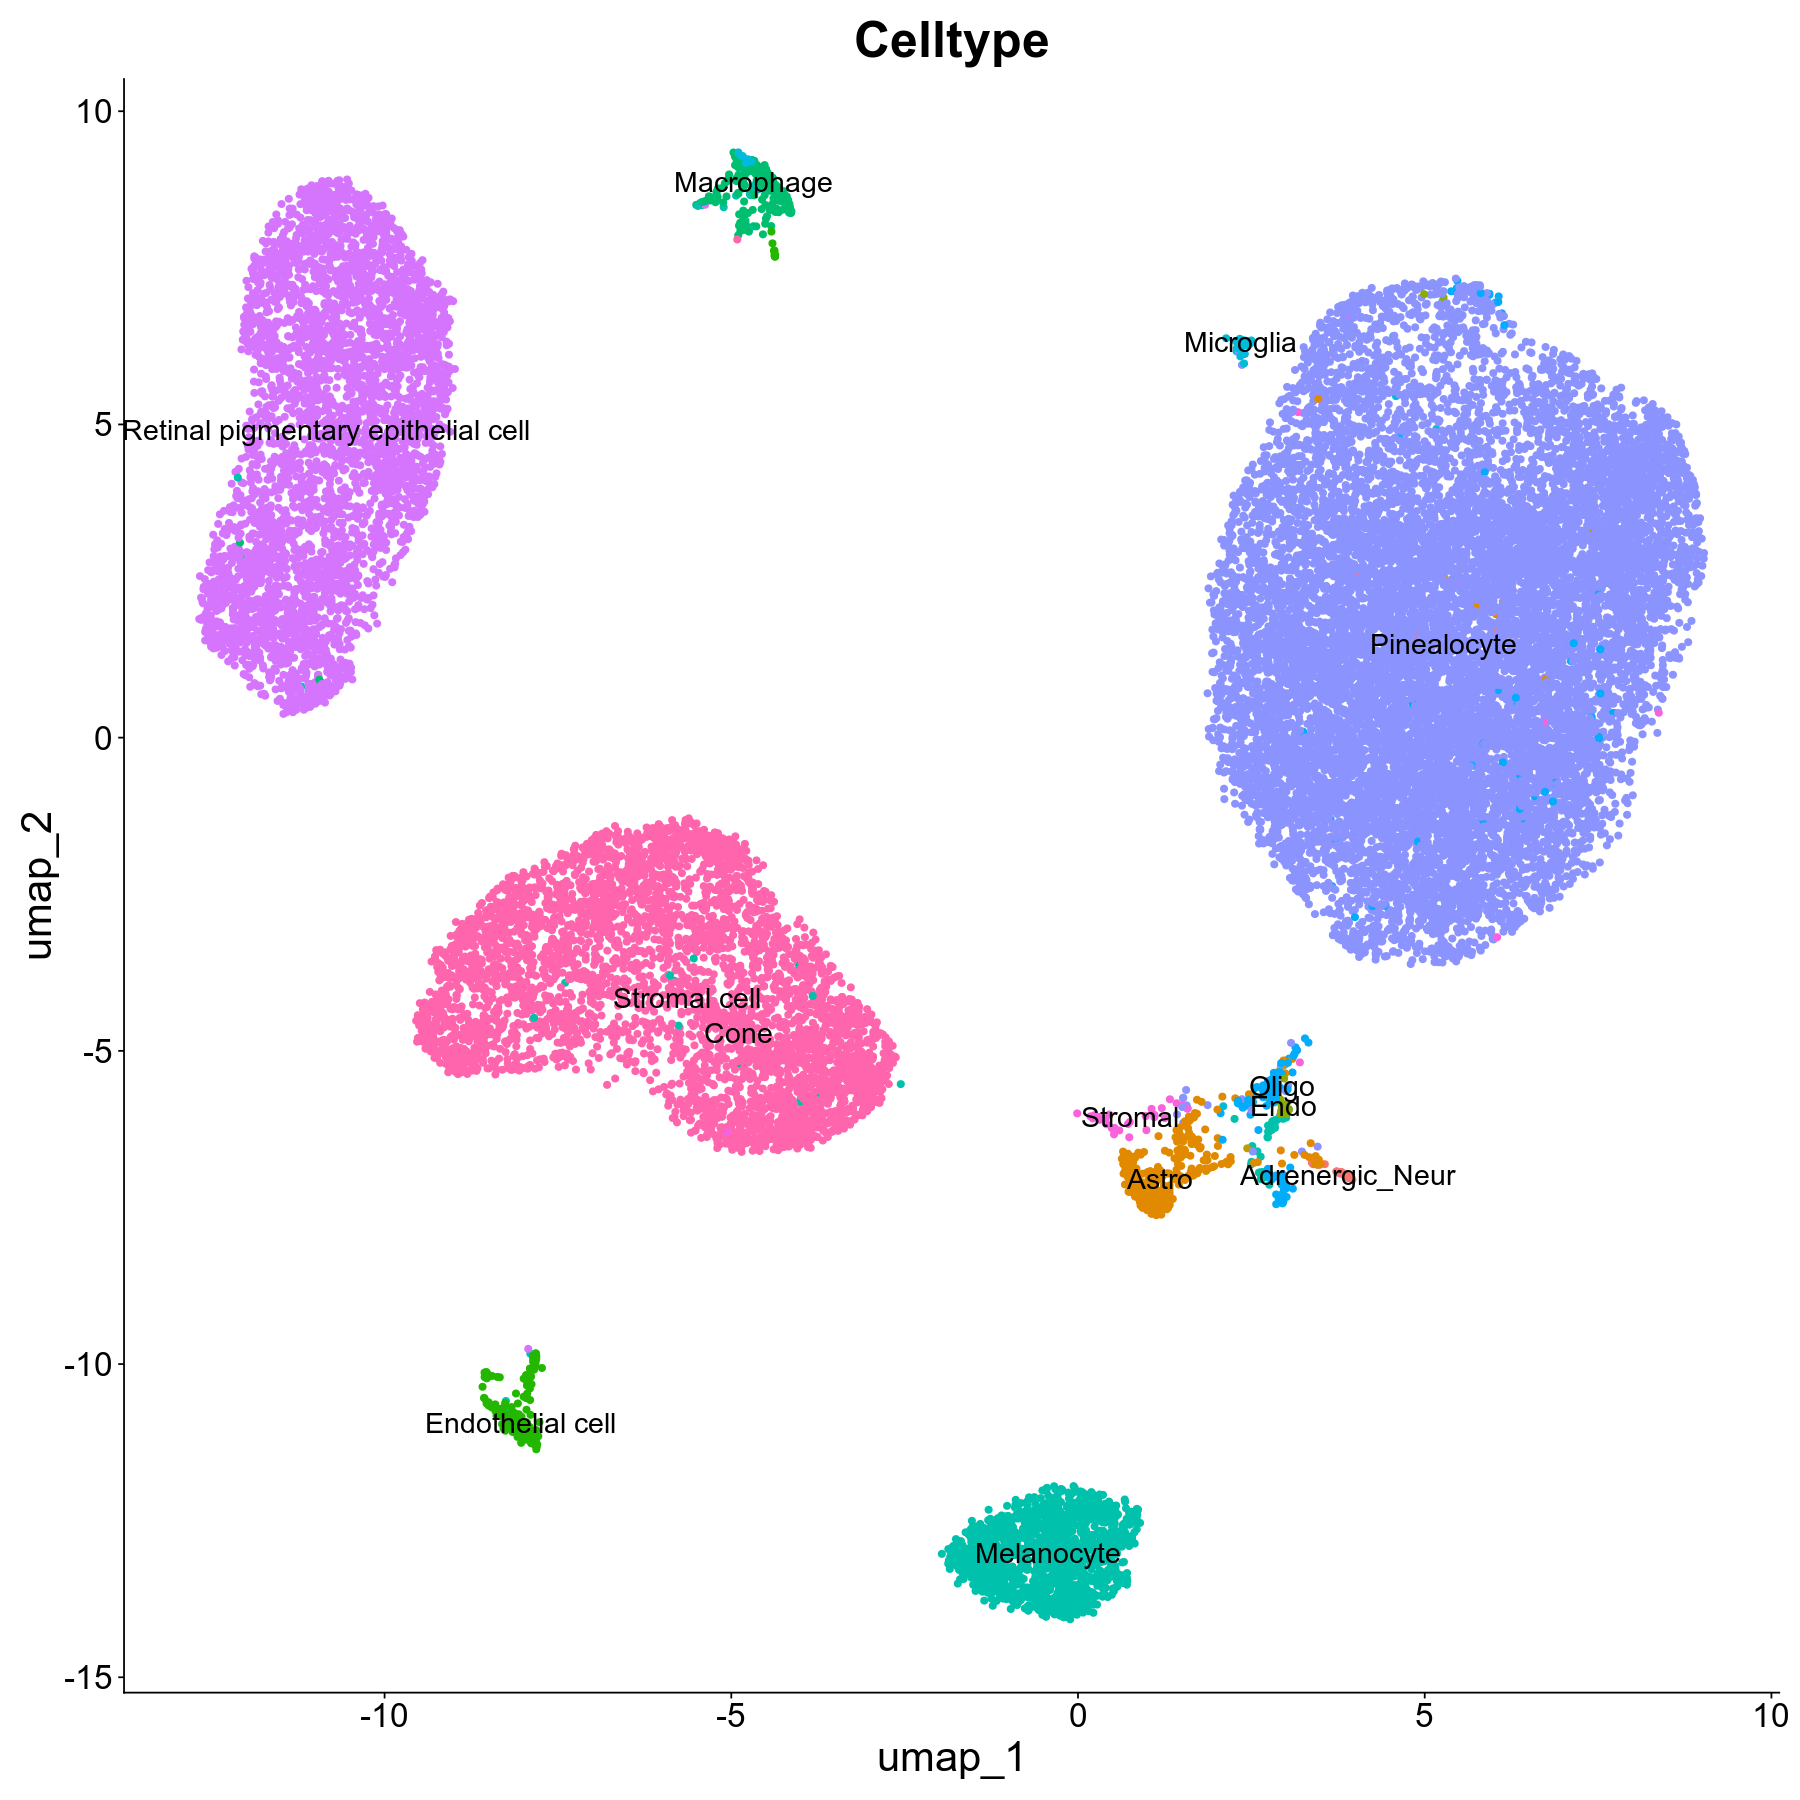

In [ ]:
options(repr.plot.width =15, repr.plot.height =15)
# Assuming `seurat_obj` is your Seurat object and UMAP has been computed
umap_plot <- DimPlot(seurat_obj_filtered, reduction = "umap", group.by = "Celltype", label = TRUE, pt.size = 1.6, label.size = 6) + NoLegend()

# Increase the size of the text labels
umap_plot + theme(
  text = element_text(size = 20),  # General text size
  plot.title = element_text(size = 30, face = "bold"),  # Title text size
  axis.title = element_text(size = 25),  # Axis title text size
  axis.text = element_text(size = 20)  # Axis text size
)

In [ ]:
# Check the column names of the metadata
colnames(seurat_obj_filtered@meta.data)


[1] "orig.ident"      "nCount_RNA"      "nFeature_RNA"    "Batch"          
 [5] "percent.mt"      "seurat_clusters" "Sample"          "Tissue"         
 [9] "Celltype"        "Abbreviation"    "RNA_snn_res.0.5" "RNA_snn_res.0.8"

In [ ]:
# First, ensure the Celltype column is properly referenced
cell_metadata <- seurat_obj_filtered@meta.data

# Subset the metadata to exclude specific cell types
filtered_cells <- cell_metadata[!cell_metadata$Celltype %in% c( "Oligo", "Endo", "Endo", "Cone", "Stromal", "Adrenergic_Neur"), ]

# Get the names of the remaining cells
remaining_cells <- rownames(filtered_cells)

# Subset the Seurat object to include only the remaining cells
seurat_obj_filtered1 <- subset(seurat_obj_filtered, cells = remaining_cells)

# Verify that the subsetting worked
table(seurat_obj_filtered1$Celltype)



                             Astro                   Endothelial cell 
                               364                                335 
                        Macrophage                         Melanocyte 
                               308                               1577 
                         Microglia                        Pinealocyte 
                                35                              13765 
Retinal pigmentary epithelial cell                       Stromal cell 
                              4152                               4237 

Warning message:
“The following arguments are not used: nselect”
Centering and scaling data matrix

PC_ 1 
Positive:  CSMD1, TPH1, IQCJ-SCHIP1, PCDH15, NRXN3, SYT1, DGKB, NRXN1, NTM, GRIK1 
	   USH2A, EYS, TMEM108, SLC8A1, MEIS1, STXBP5L, CTNNA2, DACH2, SLC5A7, CA10 
	   ENSMFAG00000030097, MARCH1, MDGA2, HCN1, NEGR1, ENSMFAG00000038867, CNTNAP2, RAPGEF5, PLCL1, CADM2 
Negative:  UTRN, PITPNC1, TCF7L1, RBMS3, SYNE2, AUTS2, ANTXR1, BICC1, ENSMFAG00000030038, PID1 
	   CACHD1, EYA2, FRMD4A, NLGN1, UACA, CALD1, FHL2, PARD3B, SULF1, PDE5A 
	   DOCK5, COL25A1, RORB, ATP13A5, ENSMFAG00000002541, FBXL7, PDE7B, PRKG1, ABCA8, COL1A2 
PC_ 2 
Positive:  EBF1, ANTXR1, NHS, BICC1, CACHD1, ENSMFAG00000030038, ADAMTSL1, GPC6, FHL2, EYA1 
	   RCAN2, PDE5A, PLXDC2, ATP13A5, ENSMFAG00000002541, EXT1, PID1, PLCB1, ANKRD44, SLC35F3 
	   SETBP1, COL25A1, PDE7B, COL1A2, SLIT2, ABCA8, PDZRN3, RARB, ECE1, SDC2 
Negative:  RGR, INPP5K, RLBP1, RPE65, MYRIP, EZR, GLDC, TRPM3, TMEM56, PITPNA 
	   C1QTNF5, GPM6A, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24773
Number of edges: 829045

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8635
Number of communities: 15
Elapsed time: 4 seconds


11:05:38 UMAP embedding parameters a = 0.9922 b = 1.112

11:05:38 Read 24773 rows and found 15 numeric columns

11:05:38 Using Annoy for neighbor search, n_neighbors = 30

11:05:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:05:41 Writing NN index file to temp file /tmp/RtmpIDK77B/file213f57601fe388

11:05:41 Searching Annoy index using 1 thread, search_k = 3000

11:05:49 Annoy recall = 100%

11:05:50 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:05:51 Initializing from normalized Laplacian + noise (using RSpectra)

11:05:55 Commencing optimization for 200 epochs, with 1031632 positive edges

11:06:08 Optimization finished




   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14 
3745 3405 2821 2411 2091 1836 1721 1492 1472  961  892  790  416  384  336 

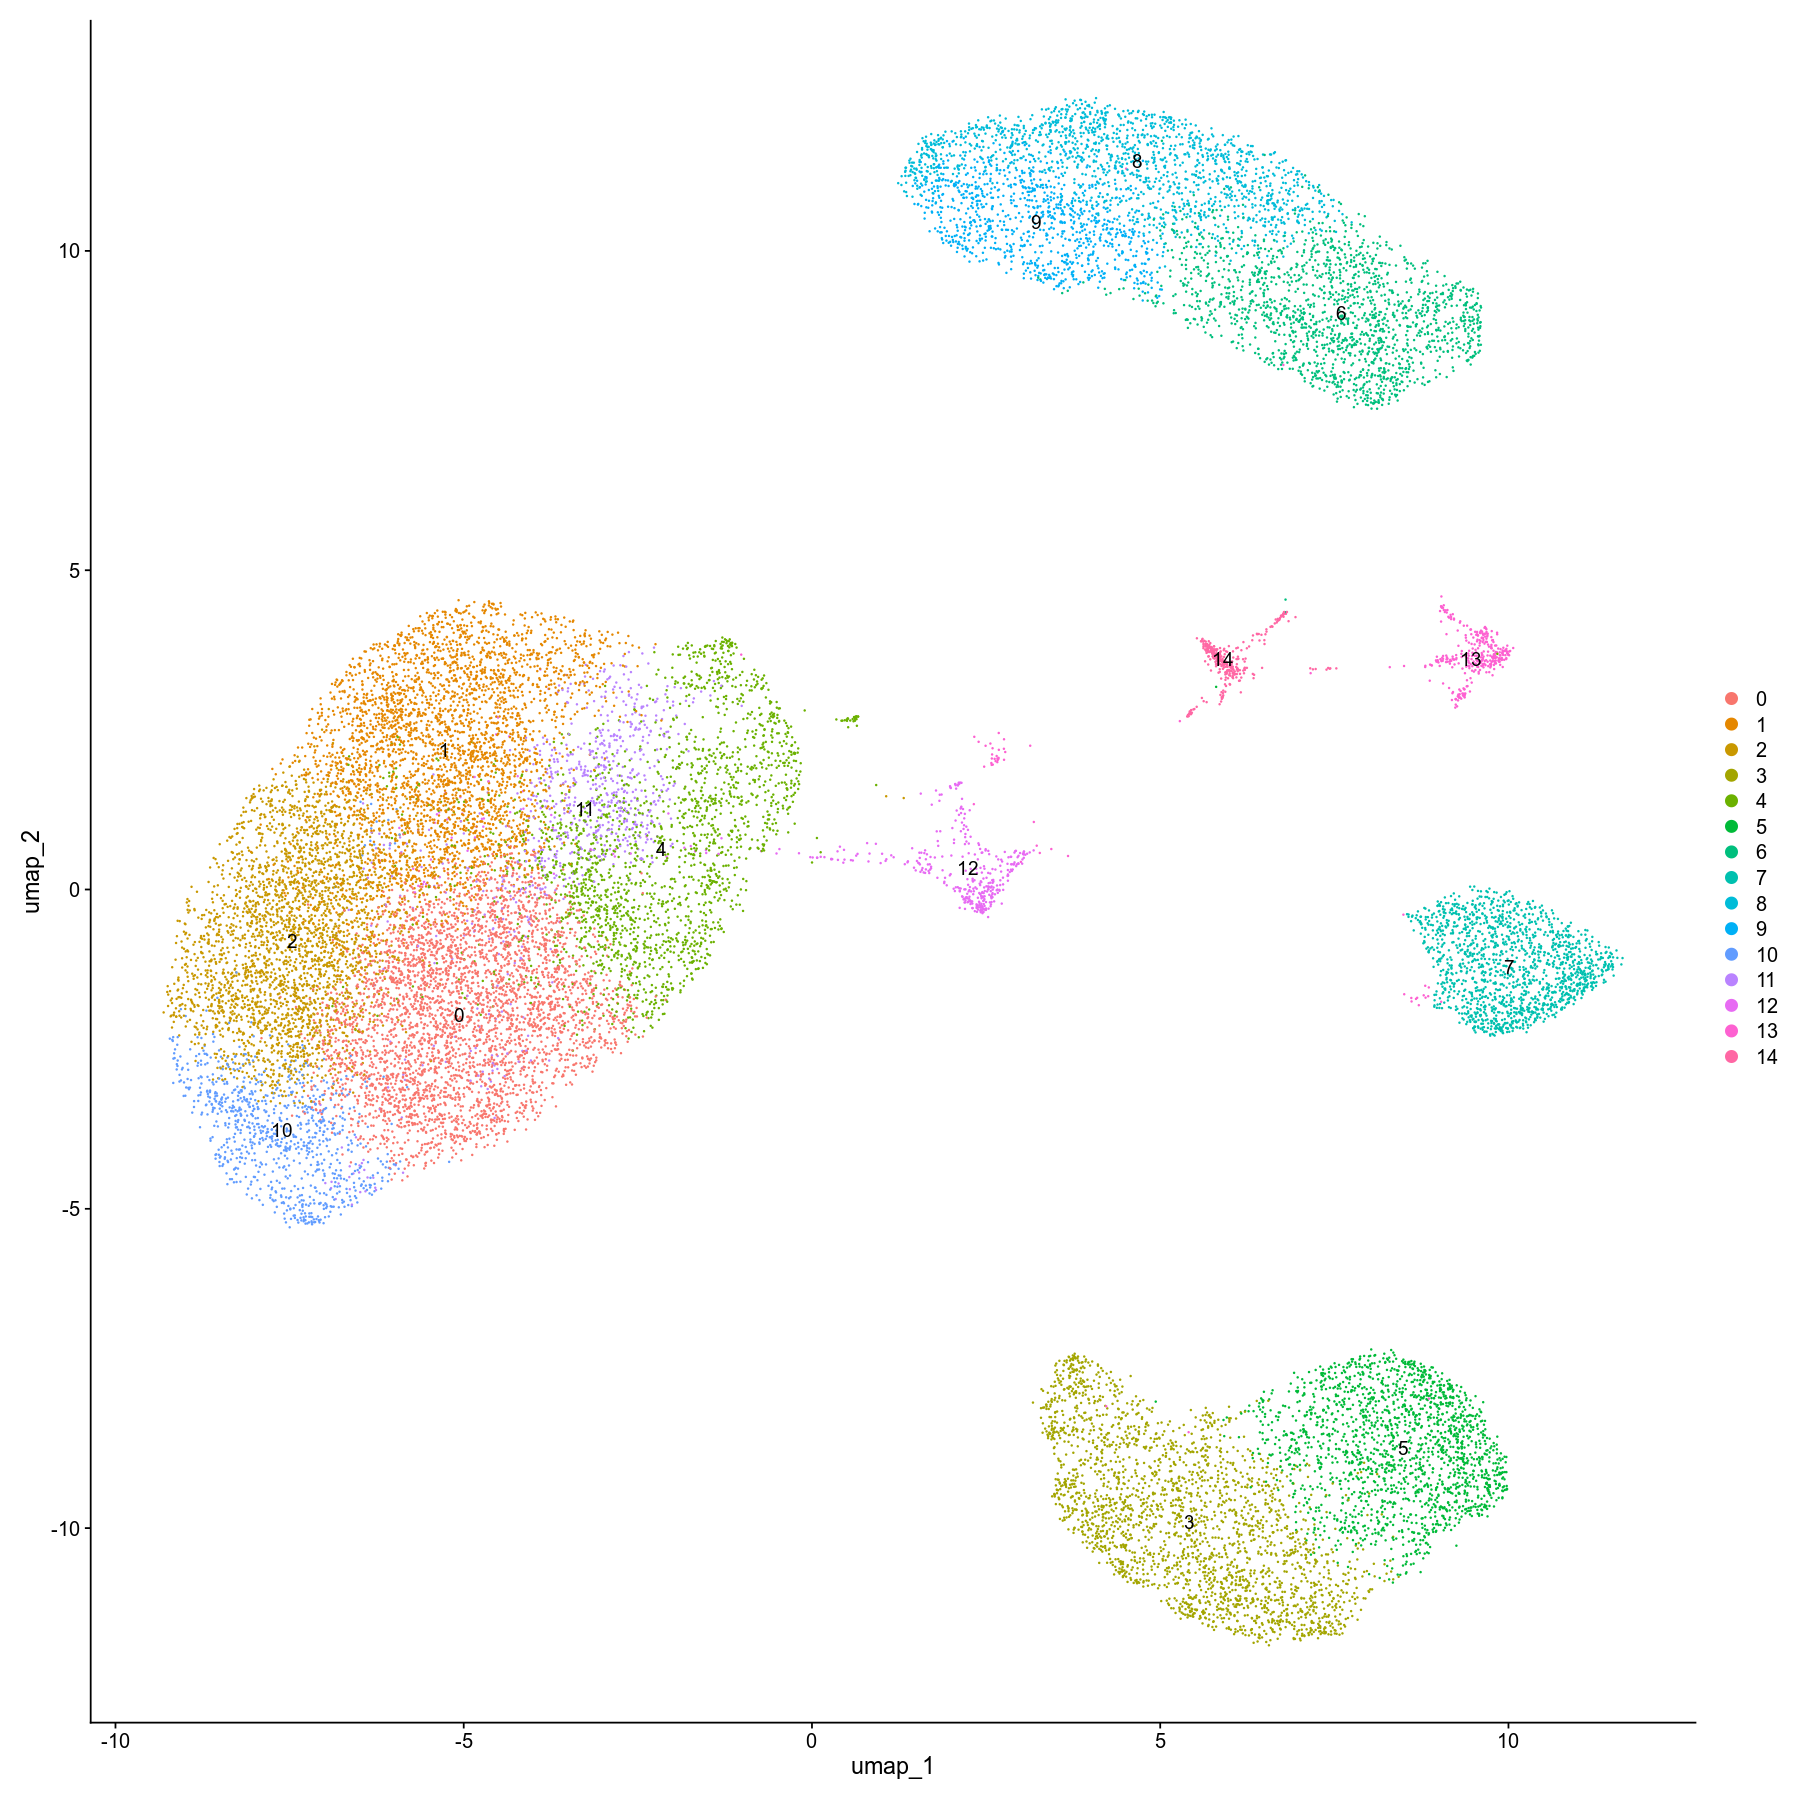

In [ ]:
# Step 2: Normalize the data again (if needed)
seurat_obj_filtered1 <- NormalizeData(seurat_obj_filtered1)

# Step 3: Find variable features
seurat_obj_filtered1 <- FindVariableFeatures(seurat_obj_filtered1)

# Step 4: Scale the data
seurat_obj_filtered1 <- ScaleData(seurat_obj_filtered1)

# Step 5: Perform PCA
seurat_obj_filtered1 <- RunPCA(seurat_obj_filtered1)

# Step 6: Find neighbors
seurat_obj_filtered1 <- FindNeighbors(seurat_obj_filtered1, dims = 1:15)

# Step 7: Perform clustering (you can adjust the resolution parameter)
seurat_obj_filtered1 <- FindClusters(seurat_obj_filtered1)

# Step 8: Run UMAP or t-SNE for visualization (optional)
seurat_obj_filtered1 <- RunUMAP(seurat_obj_filtered1, dims = 1:15)
# or
# seurat_obj_filtered <- RunTSNE(seurat_obj_filtered, dims = 1:10)

# Step 9: Plot the UMAP/t-SNE with the new clusters
DimPlot(seurat_obj_filtered1, reduction = "umap", label = TRUE)
# or
# DimPlot(seurat_obj_filtered, reduction = "tsne", label = TRUE)

# Step 10: Inspect the new clusters
table(seurat_obj_filtered1$seurat_clusters)


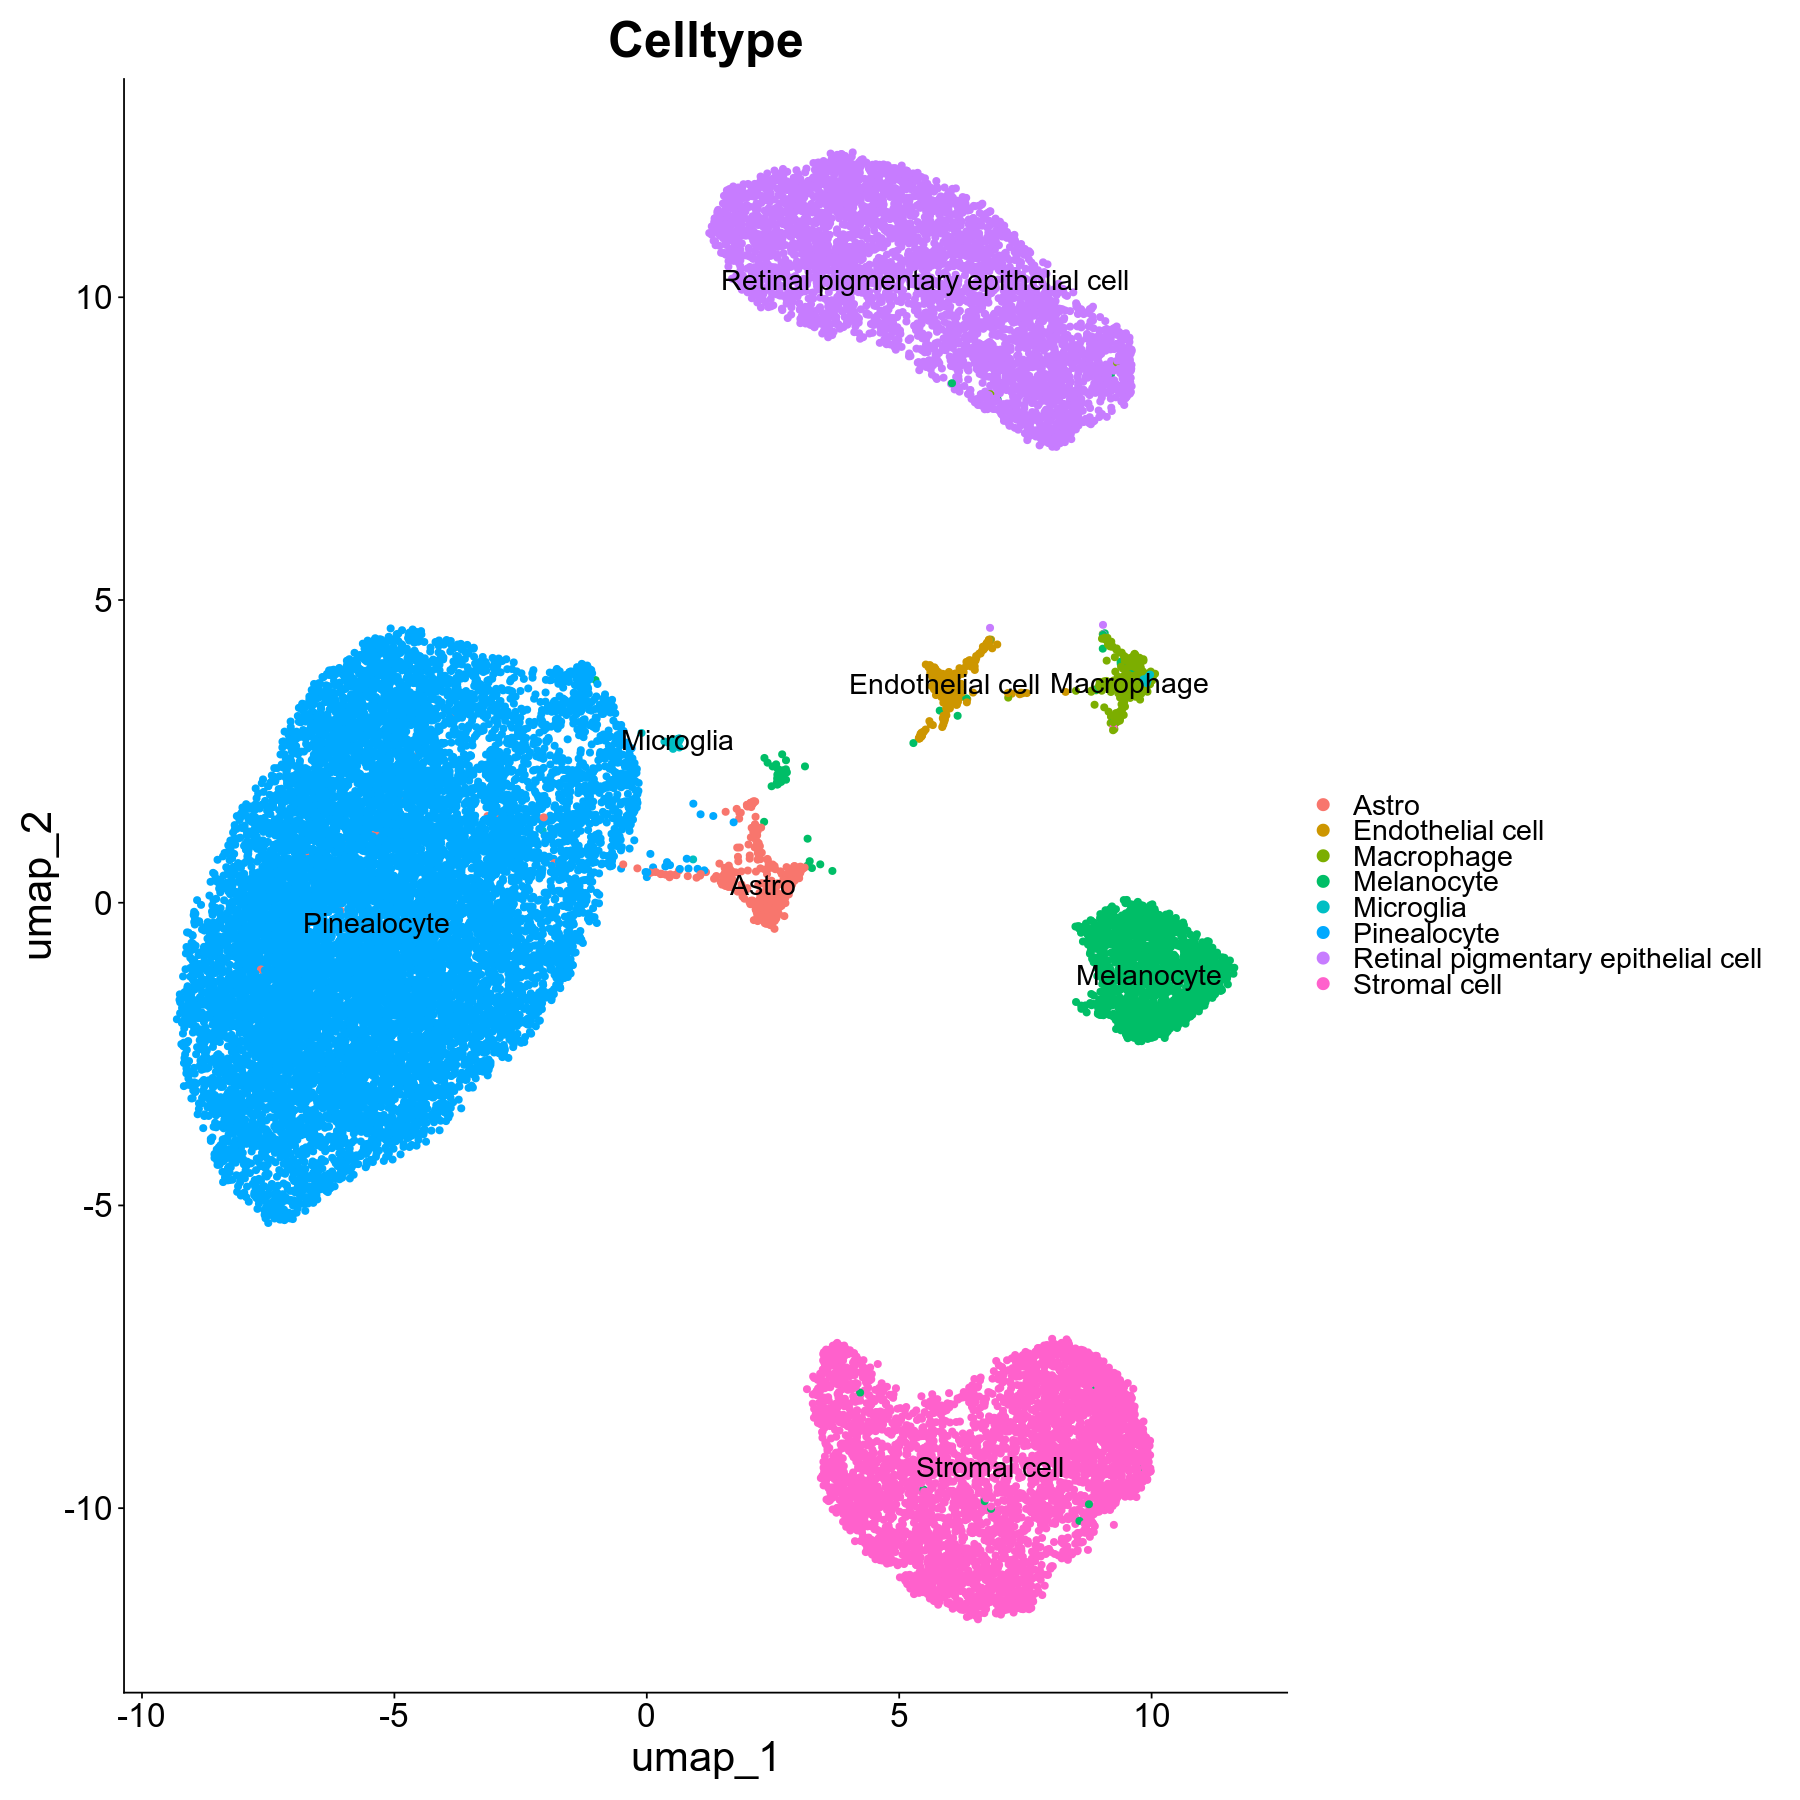

In [ ]:
options(repr.plot.width =15, repr.plot.height =15)
# Assuming `seurat_obj` is your Seurat object and UMAP has been computed
umap_plot <- DimPlot(seurat_obj_filtered1, reduction = "umap", group.by = "Celltype",  pt.size = 1.6, label.size = 6)

# Increase the size of the text labels
pos=umap_plot + theme(
  text = element_text(size = 20),  # General text size
  plot.title = element_text(size = 30, face = "bold"),  # Title text size
  axis.title = element_text(size = 25),  # Axis title text size
  axis.text = element_text(size = 20)  # Axis text size
)
# Save the plot
ggsave(filename = file_path, plot = pos, width = 6, height = 6, dpi = 300)


In [ ]:
unique(seurat_obj_filtered1@meta.data$Celltype)

[1] "Stromal cell"                       "Melanocyte"                        
[3] "Retinal pigmentary epithelial cell" "Macrophage"                        
[5] "Endothelial cell"                   "Pinealocyte"                       
[7] "Astro"                              "Microglia"

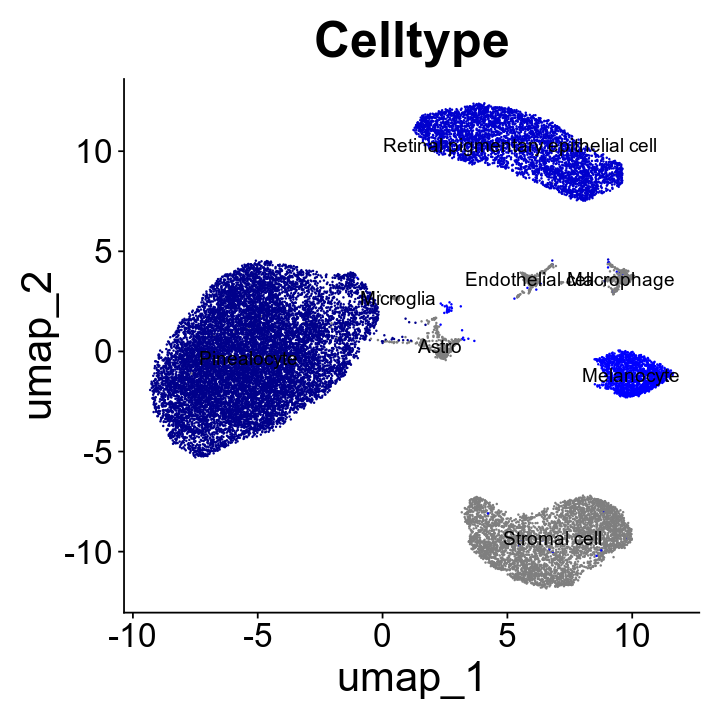

In [ ]:

# Define a custom color palette with intense shades of blue
custom_colors <- c(
  "Melanocyte" = "#0000FF",  # Pure Blue
  "Retinal pigmentary epithelial cell" = "#0000CD",  # MediumBlue
  "Pinealocyte" = "#00008B",  # DarkBlue
  # You can add more cell types with additional intense shades if needed
  "OtherCellType1" = "#4169E1",  # RoyalBlue
  "OtherCellType2" = "#1E90FF",  # DodgerBlue
  "OtherCellType3" = "#4682B4"   # SteelBlue
)

# Create UMAP plot with the custom intense shades of blue
umap_plot <- DimPlot(seurat_obj_filtered1, reduction = "umap", group.by = "Celltype", label = TRUE) +
  scale_color_manual(values = custom_colors) +  # Apply custom intense blue shades
  theme(
    text = element_text(size = 20),
    plot.title = element_text(size = 30, face = "bold"),
    axis.title = element_text(size = 25),
    axis.text = element_text(size = 20)
  ) +
  NoLegend()  # Remove legend if not needed

# Print the plot
print(umap_plot)



In [ ]:

# Assuming `seurat_obj` is your Seurat object and UMAP has been computed
umap_plot <- DimPlot(seurat_obj_filtered1, reduction = "umap", group.by = "Celltype",  pt.size = 1, label.size = 6) + NoLegend()

# Increase the size of the text labels
pos=umap_plot + theme(
  text = element_text(size = 20),  # General text size
  plot.title = element_text(size = 30, face = "bold"),  # Title text size
  axis.title = element_text(size = 25),  # Axis title text size
  axis.text = element_text(size = 20)  # Axis text size
)

ggsave("umap_FeaturePlot2.png", plot = pos, width = 6, height = 6)

In [ ]:
library(viridis)

Loading required package: viridisLite



In [ ]:
# Define the folder path where you want to save the plot
folder_path <- "~//Monkey//notebook/umap"

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


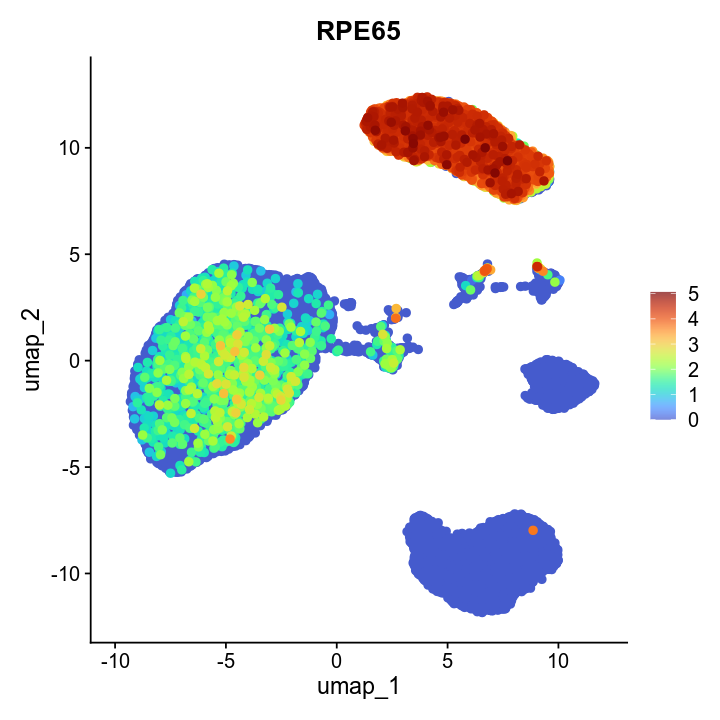

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)

pos=FeaturePlot(seurat_obj_filtered1, features = c('PMEL'), reduction = "umap",ncol = 1, pt.size=2,  order=TRUE)+scale_color_viridis(alpha=0.7, begin=0.1,end=1, option = "H", direction=1)
pos

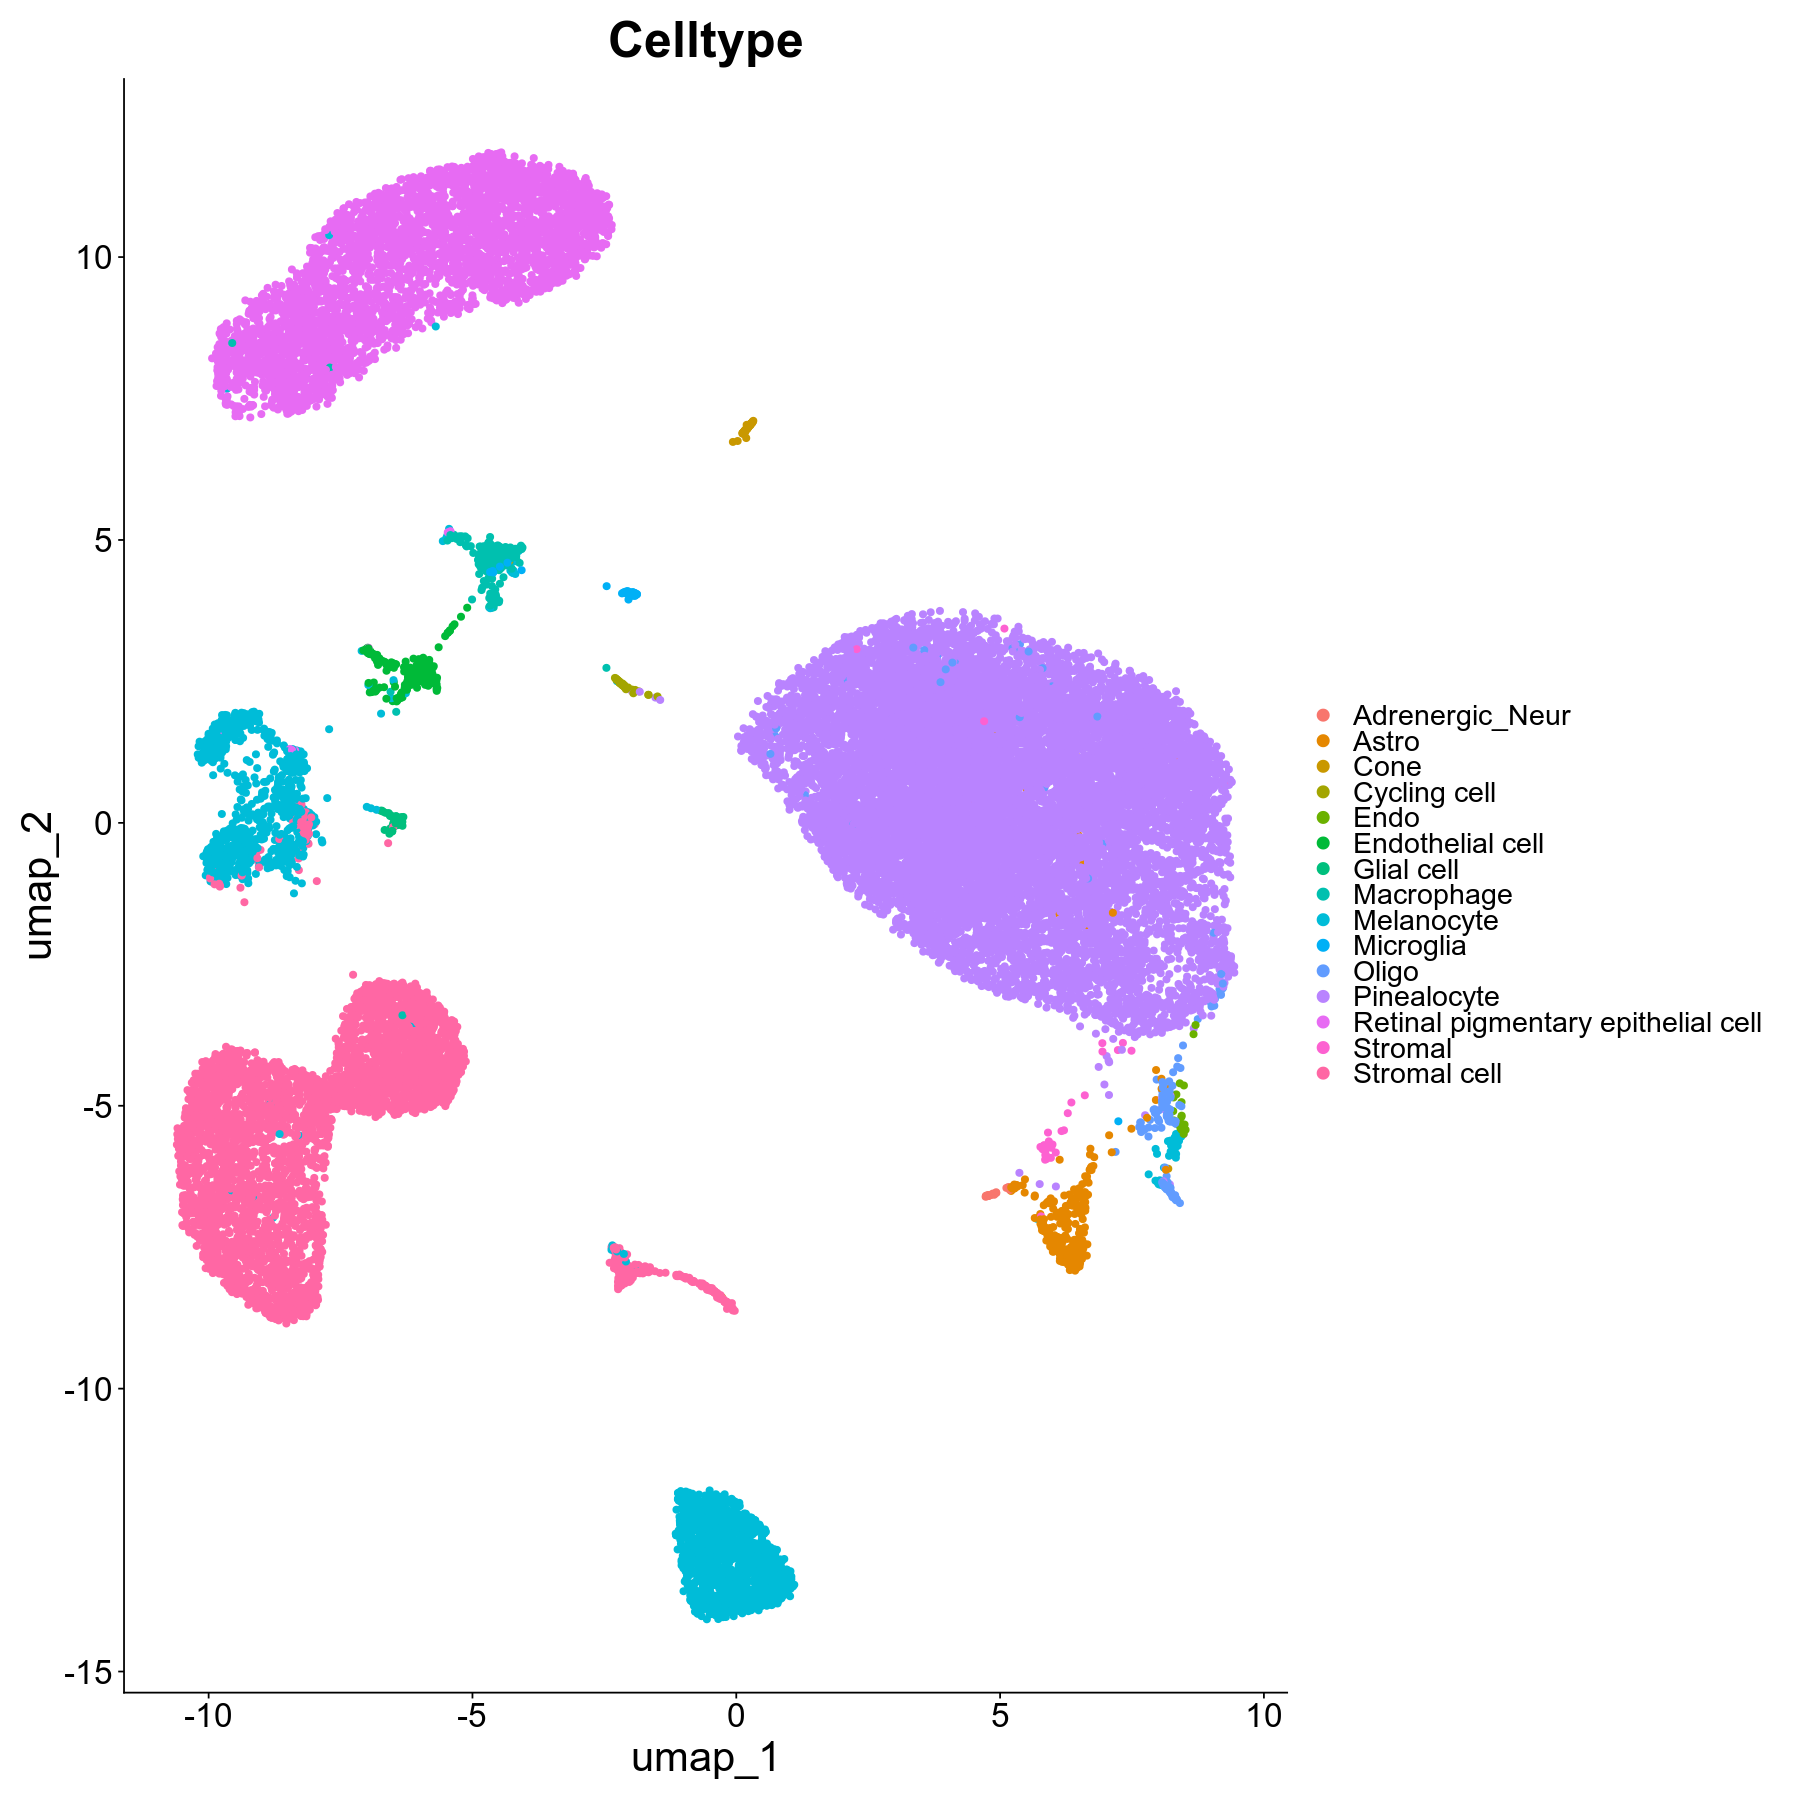

In [ ]:
# Assuming `seurat_obj` is your Seurat object and UMAP has been computed
umap_plot <- DimPlot(merged_seurat, reduction = "umap", group.by = "Celltype",  pt.size = 1.6, label.size = 6)

# Increase the size of the text labels
umap_plot + theme(
  text = element_text(size = 20),  # General text size
  plot.title = element_text(size = 30, face = "bold"),  # Title text size
  axis.title = element_text(size = 25),  # Axis title text size
  axis.text = element_text(size = 20)  # Axis text size
)


In [ ]:
install.packages("viridis")
library(viridis)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: viridisLite



In [ ]:
seurat<-seurat_obj_filtered1

In [ ]:
unique(seurat@meta.data$Celltype)

[1] "Stromal cell"                       "Melanocyte"                        
[3] "Retinal pigmentary epithelial cell" "Macrophage"                        
[5] "Endothelial cell"                   "Pinealocyte"                       
[7] "Astro"                              "Microglia"

In [ ]:
# Create a new cell type annotation column
seurat@meta.data$celltype_masked <- seurat@meta.data$Celltype

In [ ]:
# Define the target cell types to keep
target_cell_types <- c("Melanocyte", "Retinal pigmentary epithelial cell", "Pinealocyte")

In [ ]:
# Mask other cell types as "rest"
seurat@meta.data$celltype_masked[!seurat@meta.data$Celltype %in% target_cell_types] <- "rest"

In [ ]:
Idents(seurat) <- seurat@meta.data$celltype_masked


In [ ]:
seurat@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,Batch,percent.mt,seurat_clusters,Sample,Tissue,Celltype,Abbreviation,RNA_snn_res.0.5,RNA_snn_res.0.8,celltype_masked
,<chr>,<dbl>,<int>,<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>
Pigmentary_epi_AGTTCCTGTCTTCTCACTCC_1,SeuratProject,4734.096,2655,Pigmentary_epi_303,0.15675640,3,MM1,Pigmentary_epi,Stromal cell,Stromal,4,3,rest
Pigmentary_epi_CGCGAGGACCAAGTCCTCCT_1,SeuratProject,5000.070,2661,Pigmentary_epi_303,0.00000000,5,MM1,Pigmentary_epi,Stromal cell,Stromal,5,5,rest
Pigmentary_epi_CGCGAATCAGCACATGTTAC_1,SeuratProject,6001.162,2729,Pigmentary_epi_303,0.01351544,13,MM1,Pigmentary_epi,Melanocyte,Melanocyte,11,13,Melanocyte
Pigmentary_epi_TTGCAGCCGCCTGGCTTCCG_1,SeuratProject,4670.891,2537,Pigmentary_epi_303,0.00000000,8,MM1,Pigmentary_epi,Retinal pigmentary epithelial cell,Retinal pigmentary epi,3,8,Retinal pigmentary epithelial cell
Pigmentary_epi_AAGATGGCCTATCGTATAGG_1,SeuratProject,4991.471,2541,Pigmentary_epi_303,0.00000000,8,MM1,Pigmentary_epi,Retinal pigmentary epithelial cell,Retinal pigmentary epi,3,8,Retinal pigmentary epithelial cell
Pigmentary_epi_GAATTCTCGGCTTAGCAACC_1,SeuratProject,5097.368,2994,Pigmentary_epi_303,0.01486881,13,MM1,Pigmentary_epi,Melanocyte,Melanocyte,11,13,Melanocyte
Pigmentary_epi_AAGCGCTTAAACACCACCGC_1,SeuratProject,4779.736,2329,Pigmentary_epi_303,0.00000000,8,MM1,Pigmentary_epi,Retinal pigmentary epithelial cell,Retinal pigmentary epi,3,8,Retinal pigmentary epithelial cell
Pigmentary_epi_TTGAATGCGTTAAGGTATTC_1,SeuratProject,4133.765,2490,Pigmentary_epi_303,0.00000000,8,MM1,Pigmentary_epi,Retinal pigmentary epithelial cell,Retinal pigmentary epi,3,8,Retinal pigmentary epithelial cell
Pigmentary_epi_CAGGCGTACTGTTGCTCCTT_1,SeuratProject,4236.704,2369,Pigmentary_epi_303,0.00000000,8,MM1,Pigmentary_epi,Retinal pigmentary epithelial cell,Retinal pigmentary epi,3,8,Retinal pigmentary epithelial cell


In [ ]:
options(repr.plot.width =15, repr.plot.height =2.5)

In [ ]:
###working

Warning message:
“Scaling data with a low number of groups may produce misleading results”


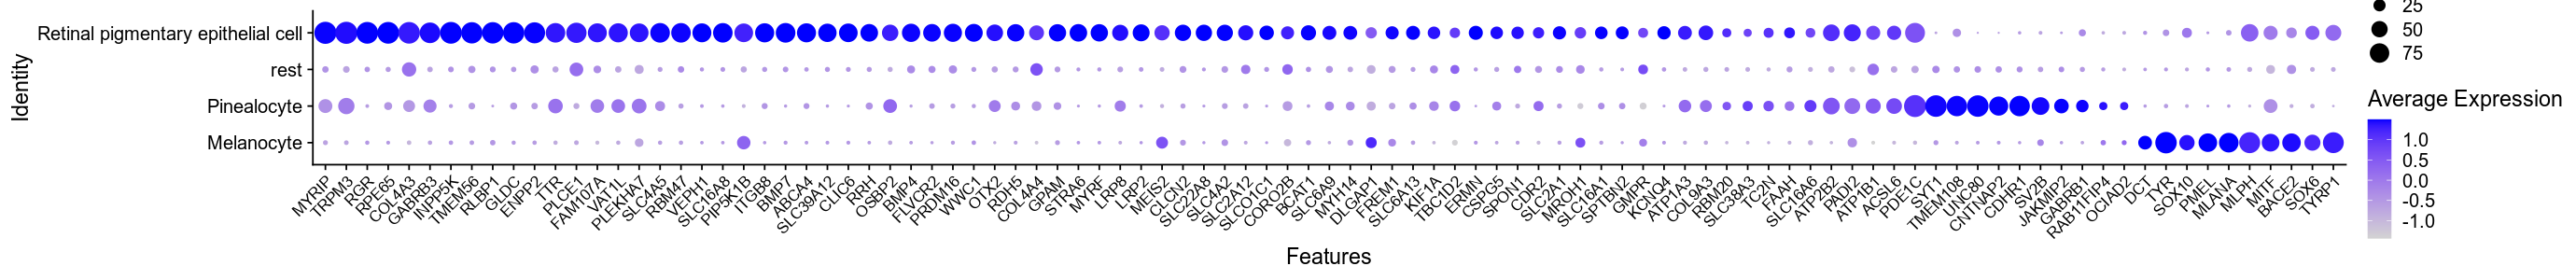

In [ ]:
options(repr.plot.width =23, repr.plot.height =2.5)
ordered_genes <- c("MYRIP", "TRPM3",  "RGR", "RPE65",
                   "COL4A3", "GABRB3", "INPP5K",  "TMEM56", "RLBP1",
                   "GLDC",  "ENPP2", "TTR",
                   "PLCE1", "FAM107A", "VAT1L", "PLEKHA7",
                   "SLC4A5", "RBM47",  "VEPH1", "SLC16A8", "PIP5K1B",
                   "ITGB8", "BMP7", "ABCA4", "SLC39A12",
                   "CLIC6",  "RRH", "OSBP2", "BMP4", "FLVCR2",
                   "PRDM16", "WWC1",  "OTX2", "RDH5",
                   "COL4A4", "GPAM",  "STRA6",  "MYRF",
                   "LRP8", "LRP2", "MEIS2", "CLCN2", "SLC22A8", "SLC4A2", "SLC2A12", "SLCO1C1", "CORO2B",
                    "BCAT1", "SLC6A9",  "MYH14", "DLGAP1",
                    "FREM1", "SLC6A13", "KIF1A", "TBC1D2", "ERMN",
               "CSPG5", "SPON1", "CDR2",   "SLC2A1", "MROH1",  "SLC16A1", "SPTBN2", "GMPR",
                   "KCNQ4",
                   #"SIX3", "SLC13A3",   "RDH10", "LHX2","FAM13A","SPOCK1",

                   "ATP1A3",
                   "COL9A3", "RBM20", "SLC38A3","TC2N", "FAAH",  "SLC16A6","ATP2B2", "PADI2","ATP1B1","ACSL6", "PDE1C",

                   "SYT1","TMEM108", "UNC80","CNTNAP2","CDHR1", "SV2B", "JAKMIP2","GABRB1",
                   "RAB11FIP4",
                   "OCIAD2", "DCT", "TYR", "SOX10","PMEL", "MLANA", "MLPH", "TYR", "MITF","SOX10","BACE2", "SOX6", "TYRP1"
    )


# Remove duplicates from the common list
ordered_genes <- unique(ordered_genes)

# Check which genes are present in the seurat object
#RPE_filt1 <- RPE_filt[RPE_filt %in% rownames(seurat)]

# Generate the dot plot with the filtered list
DotPlot(seurat, features = ordered_genes, group.by = "celltype_masked", scale.by = "size") +
    RotatedAxis() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10))
